## Process Tidal Data

In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 16})

### 1. Read source data file

First, read the data file containing the neutron star (NS) equations of states (EoS) and their mass-radius ($M-R$) curves. Look at the first few rows of all columns. 

In [2]:
df = pd.read_csv("tidal.csv", low_memory=False)
df.head()

,ed_0,P_0,M_0,R_0,ed_1,P_1,M_1,R_1,ed_2,P_2,...,M_197,R_197,ed_198,P_198,M_198,R_198,ed_199,P_199,M_199,R_199
0,0.000236,0.00001,0.500000,12.51064,0.000237,0.00001,0.507602,12.48922,0.000239,0.000011,...,1.817522,8.973816,0.001920,0.001157,1.817640,8.950100,0.001948,0.001185,1.817635,8.926486
1,0.000236,0.00001,0.500004,12.51063,0.000237,0.00001,0.505010,12.49639,0.000238,0.000010,...,1.915204,11.309820,0.000779,0.000231,1.919826,11.297250,0.001310,0.000234,1.920017,11.292920
2,0.000236,0.00001,0.500004,12.51063,0.000237,0.00001,0.507147,12.49047,0.000239,0.000011,...,1.815871,9.185647,0.001760,0.000871,1.816103,9.163891,0.001785,0.000890,1.816213,9.142128
3,0.000236,0.00001,0.500004,12.51063,0.000237,0.00001,0.506535,12.49215,0.000239,0.000011,...,1.610028,9.399669,0.001757,0.000596,1.610049,9.375170,0.001771,0.000608,1.610045,9.350495
4,0.000236,0.00001,0.500004,12.51063,0.000237,0.00001,0.505848,12.49407,0.000238,0.000010,...,1.891711,10.642860,0.001410,0.000389,1.894120,10.621260,0.001437,0.000396,1.894606,10.608890


The columns $\mathrm{ed}_0 \cdots \mathrm{ed}_{199}$ are energy densities, $P_0 \cdots P_{199}$ are pressures, $M_0 \cdots M_{199}$ are masses, and $R_0 \cdots R_{199}$ are radii of neutron stars. The EoS is the pressure $P$ as a function of energy density $\epsilon$, i.e, $P=P(\epsilon)$, while the $M-R$ curve is the inverse of radius $R$ as a function of mass $M$, i.e. $R=R(M)$.

### 2. Load data from file

Load the energy density $\mathbf{E}$, pressure $\mathbf{P}$, mass $\mathbf{M}$, and radius $\mathbf{R}$ matrices. Check their dimensions.

In [3]:
ϵ = df.iloc[0:, 0:800:4]
p = df.iloc[0:, 1:800:4]
m = df.iloc[0:, 2:800:4]
r = df.iloc[0:, 3:800:4]

ϵ = np.array(ϵ)
p = np.array(p)
m = np.array(m)
r = np.array(r)

print("dim(ϵ) =", ϵ.shape[0], "x", ϵ.shape[1])
print("dim(P) =", p.shape[0], "x", p.shape[1])
print("dim(M) =", m.shape[0], "x", m.shape[1])
print("dim(R) =", r.shape[0], "x", r.shape[1])

dim(ϵ) = 5489 x 200
dim(P) = 5489 x 200
dim(M) = 5489 x 200
dim(R) = 5489 x 200


### 3. Visualize data

Plot some randomly chosen $M-R$ curves and their corresponding EoS.

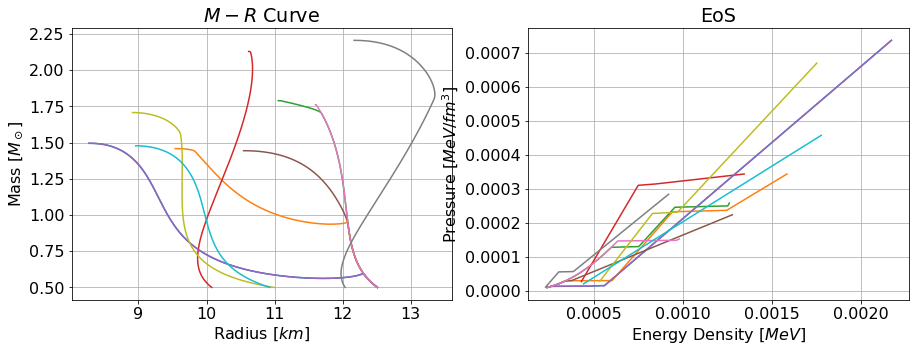

In [4]:
fig, ax = plt.subplots(1,2, figsize=(15,5))
ax[0].set_xlabel("Radius [$km$]")
ax[0].set_ylabel("Mass [$M_\odot$]")
ax[0].set_title("$M-R$ Curve")
ax[0].grid()
ax[1].set_xlabel("Energy Density [$MeV$]")
ax[1].set_ylabel("Pressure [$MeV / fm^3$]")
ax[1].set_title("EoS")
ax[1].grid()
for j in range(10):
    i = np.random.choice(r.shape[0])
    xe = ϵ[i]
    yp = p[i]
    xr = r[i]
    ym = m[i]
    ax[0].plot(xr, ym)
    ax[1].plot(xe, yp)

Upon visual inspection, it appears that all cells in the four matrices are non-zeros. So, we keep all rows and columns of these matrices.

### 6. Write the processed data to files

Finally, the data is ready to be used for training neural networks. We save the energy density, pressure, mass, and radius matrices into text files.

In [5]:
np.savetxt("e_td.txt", ϵ)
np.savetxt("p_td.txt", p)
np.savetxt("m_td.txt", m)
np.savetxt("r_td.txt", r)